<a href="https://colab.research.google.com/github/NuwanNM523/HanwrittenDigitRecognition/blob/main/Identify_hand_written_digits_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [ ]:
#importing Dataset
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Normalizing Dataset
train_img = train_img.reshape(60000,28,28,1)
test_img = test_img.reshape(10000,28,28,1)
train_img = keras.utils.all_utils.normalize(train_img, axis=1)
test_img = keras.utils.all_utils.normalize(test_img, axis=1)

In [ ]:
#Building Model
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(3,3)) 
model.add(Conv2D(16,(3,3)))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#compiling the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#Fitting the Model
model.fit(train_img, train_lab, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2712 - accuracy: 0.9173
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0900 - accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0626 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0498 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0406 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0337 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0203 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [ ]:
#Evaluate the Model
print(model.evaluate(test_img,test_lab))

313/313 [==============================] - 3s 8ms/step - loss: 0.0440 - accuracy: 0.9887
[0.04398899897933006, 0.9886999726295471]


In [ ]:
#Predicting First 10 test images
pred = model.predict(test_img[:10])
#print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


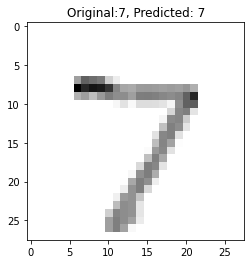

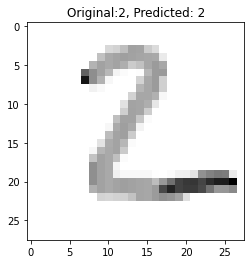

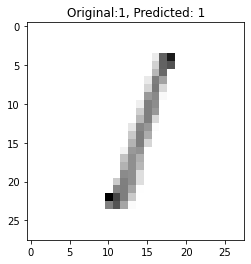

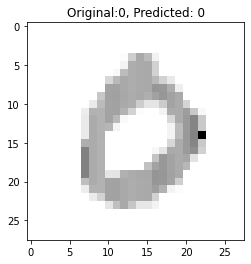

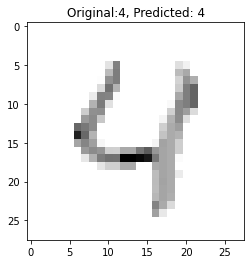

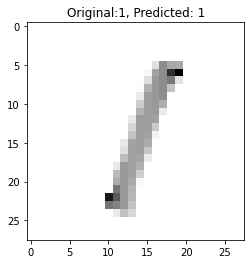

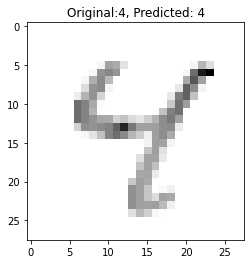

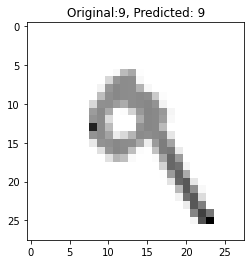

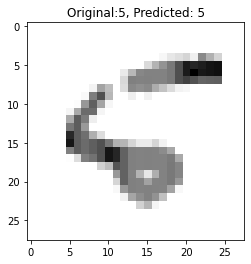

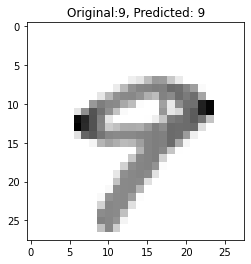

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualization Prediction
for i in range(10):
  plt.imshow(test_img[i]. reshape(28,28), cmap='binary')
  plt.title("Original:{}, Predicted: {}". format(test_lab[i],p[i]))
  plt.figure()